## Plot/save panel D of FRP vs translation rate for strong and weak oscillators

[0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.16999999999999998, 0.18, 0.19, 0.2, 0.21000000000000002, 0.22, 0.22999999999999998, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.39999999999999997, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.5800000000000001, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
vs =  1.0  ks =  0.11 : period_avg =  29.433333333333337
vs =  1.0  ks =  0.12 : period_avg =  28.233333333333334


C:\Users\robb\AppData\Local\Temp\ipykernel_26312\3695091672.py:63: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v_array = np.array(v, dtype=np.float)


vs =  1.0  ks =  0.13 : period_avg =  27.200000000000003
vs =  1.0  ks =  0.14 : period_avg =  26.26666666666667
vs =  1.0  ks =  0.15 : period_avg =  25.516666666666666
vs =  1.0  ks =  0.16 : period_avg =  24.983333333333334
vs =  1.0  ks =  0.16999999999999998 : period_avg =  24.666666666666668
vs =  1.0  ks =  0.18 : period_avg =  24.433333333333337
vs =  1.0  ks =  0.19 : period_avg =  24.2
vs =  1.0  ks =  0.2 : period_avg =  23.96666666666667
vs =  1.0  ks =  0.21000000000000002 : period_avg =  23.73333333333333
vs =  1.0  ks =  0.22 : period_avg =  23.533333333333335
vs =  1.0  ks =  0.22999999999999998 : period_avg =  23.3
vs =  1.0  ks =  0.24 : period_avg =  23.083333333333332
vs =  1.0  ks =  0.25 : period_avg =  22.850000000000005
vs =  1.0  ks =  0.26 : period_avg =  22.650000000000002
vs =  1.0  ks =  0.27 : period_avg =  22.433333333333337
vs =  1.0  ks =  0.28 : period_avg =  22.25000000000001
vs =  1.0  ks =  0.29 : period_avg =  22.05
vs =  1.0  ks =  0.3 : period_av

vs =  1.6  ks =  0.5700000000000001 : period_avg =  20.55
vs =  1.6  ks =  0.5800000000000001 : period_avg =  20.41666666666667
vs =  1.6  ks =  0.59 : period_avg =  20.3
vs =  1.6  ks =  0.6 : period_avg =  20.183333333333334
vs =  1.6  ks =  0.61 : period_avg =  20.066666666666674
vs =  1.6  ks =  0.62 : period_avg =  19.950000000000003
vs =  1.6  ks =  0.63 : period_avg =  19.85000000000001
vs =  1.6  ks =  0.64 : period_avg =  19.733333333333334
vs =  1.6  ks =  0.65 : period_avg =  19.63333333333334
vs =  1.6  ks =  0.66 : period_avg =  19.533333333333342
vs =  1.6  ks =  0.67 : period_avg =  19.41666666666667
vs =  1.6  ks =  0.68 : period_avg =  19.300000000000004
vs =  1.6  ks =  0.69 : period_avg =  19.200000000000003
vs =  1.6  ks =  0.7 : period_avg =  19.13333333333333
vs =  1.6  ks =  0.71 : period_avg =  19.01666666666667
vs =  1.6  ks =  0.72 : period_avg =  18.900000000000006
vs =  1.6  ks =  0.73 : period_avg =  18.850000000000005
vs =  1.6  ks =  0.74 : period_avg =  

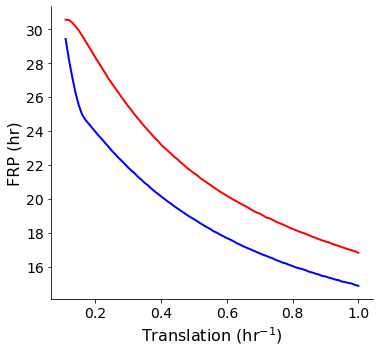

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 30 11:33:19 2020

@author: ntopo
"""

"""
Model of circadian oscillator with entraiment
"""
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
from scipy import signal
from scipy.signal import argrelextrema
%matplotlib inline

#---------------------------------------------------------------------------------------------
#    Increasing hill function
#---------------------------------------------------------------------------------------------    
def hill_up(x, k, n):
    h = np.power(x,n)/(np.power(k,n) + np.power(x,n))
    return h

#---------------------------------------------------------------------------------------------
#    Decreasing hill function
#---------------------------------------------------------------------------------------------    
def hill_down(x, k, n):
    h = np.power(k,n)/(np.power(k,n) + np.power(x,n))
    return h

#---------------------------------------------------------------------------------------------
#    Generage a squate function of time series t with given period and amplitude
#---------------------------------------------------------------------------------------------
def square_wave(t, period, amp):
    wave = amp*signal.square(2 * np.pi * t/period)+amp
    return wave
            
#---------------------------------------------------------------------------------------------
#    Function defining differential equation for the model
#---------------------------------------------------------------------------------------------
def df(y, t):
    #assign input vector,y to variables of the model
    M  = y[0]
    PC = y[1]
    PN = y[2]

 
    # mRNA expression
    dM =  vs*hill_down(PN, KI, 4) - vm*hill_up(M, Km, 1) - square_wave(t, light_period, light_amp)*M
    # Protein concentration, PC - celllular, PN - nuclear
    dPC =   ks*M + k2*PN - k1*PC    - vd*hill_up(PC, Kd, 1)
    dPN =        - k2*PN + k1*PC
    # output right-hand side of differetial equations
    return [dM, dPC, dPN]

#---------------------------------------------------------------------------------------------
#    Find location and amplitude of peaks in a variable v with given timeline t
#---------------------------------------------------------------------------------------------
def find_peaks(t,v):
    # convert vontage trace into array
    v_array = np.array(v, dtype=np.float)
    # Find indices of local max(spikes)
    locs_max = argrelextrema(v_array, np.greater, order=2)[0]
    # Record spike times and max voltages in a dataframe
    peak_times = t[locs_max]
    peak_amp   = v[locs_max]
    return(peak_times, peak_amp)

#---------------------------------------------------------------------------------------------
#    Make a dataframe with parameters and information for strong and weak oscillators
#---------------------------------------------------------------------------------------------
#def oscillator_summary():
    #vs_list   = [0.75  , 1.   ]
    #vs_names  = ['Weak', 'Strong']
    #vs_colors = ['black', 'red']
   # df = pd.DataFrame(zip(vs_names, vs_colors), columns =[ 'type', 'color'], index = vs_list)
   # return(df)

#---------------------------------------------------------------------------------------------
#    Plot all variable of the model for the last plotting_time hours
#    Each plot is labeled by information in list names
#---------------------------------------------------------------------------------------------
def plot_non_transients(soln,dt, names, plotting_time, var_label):
    # Make time array for plotting
    t  = np.arange(0,plotting_time, dt)
    n_ind = len(t)
    n_subplots = len(variable_names)
    periods = []
    # For each variable in names list, plot last n_ind values versus time
    for i in range(0,n_subplots):
        variable = soln[-n_ind:,i]
        [peaks, amp] = find_peaks(t,variable)
        
        periods.append(peaks[-1]-peaks[-2])
   
    return periods
#---------------------------------------------------------------------------------------------
#    Parameters of the model
#---------------------------------------------------------------------------------------------
vs = 1.6; vm = 0.505; Km = 0.5
KI = 1.0; ks = 0.2; vd = 1.4
Kd = 0.13; k1 = 0.5; k2 = 0.6

#---------------------------------------------------------------------------------------------
# Paramters light stimilus (amplitude means DD)
#---------------------------------------------------------------------------------------------
light_period = 24
light_amp = 0

#---------------------------------------------------------------------------------------------
#   Initial conditions
#---------------------------------------------------------------------------------------------
M0  = 0.89009363    
PC0 = 0.83699889
PN0 = 1.25723695
y0= [2.15404051, 3.19312247, 3.11948775] 

# Choose variable names for plotting
variable_names = ['mRNA', 'Cytosol protein', 'Nuclear Protein']

#---------------------------------------------------------------------------------------------
#   Run the simulation of the model 
#---------------------------------------------------------------------------------------------
# Choose total time of simulation, T
T = 1000.
# Chose time step
dt=0.05
# Make a time grid for the simulation
nsteps=int(T/dt)
t  = np.linspace(0, T, nsteps) 
# Chose number of simulation hours(last) which will be plotted
plotting_T = 100
vs_list = [1.0,1.6]
ks_list = [0.11 + 0.01*i for i in range(0,90)]
#ks_list = [0.11 + 0.01*i for i in range(0,10)]
plt.figure(figsize = (5.38, 5))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Translation (hr$^{-1})$',fontsize=16)
plt.ylabel('FRP (hr)',fontsize=16)
for vs in vs_list:
    period_list = []
    print(ks_list)
    for ks in ks_list:
        # Solve ODE for the model and plot the solution
        soln = odeint(df, y0, t)
        periods_ret = plot_non_transients(soln, dt, variable_names, plotting_T, 'ks = '+str(ks))
        period_avg = np.array(periods_ret).mean()
        print('vs = ',vs,' ks = ',ks,': period_avg = ',period_avg)
        period_list.append(period_avg)
        
    if vs == vs_list[0]:
        color_string = 'blue'
    else:
        color_string = 'red'
    plt.plot(ks_list,period_list,lw=2, color = color_string)

plt.tight_layout()
plt.savefig("FRP-vs-ks-weak-strong.jpeg",dpi=300)
plt.show()


## Add 'D' label to panel D figure

In [2]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

mimage = Image.open('FRP-vs-ks-weak-strong.jpeg')

draw = ImageDraw.Draw(mimage)
font = ImageFont.truetype('arialbd', 78)
draw.text((37, 27),"D",fill = 'black', font = font)
mimage.save('FRP-vs-ks-weak-strong-D.jpeg')

## Plot/save panel B with mRNA/protein concentration vs time for strong and weak oscillators (including the 'B' label)

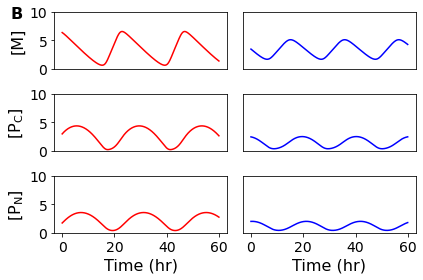

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 30 11:33:19 2020

@author: ntopo
"""

"""
Model of circadian oscillator with entraiment
"""
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
from scipy import signal
from scipy.signal import argrelextrema
%matplotlib inline

#---------------------------------------------------------------------------------------------
#    Increasing hill function
#---------------------------------------------------------------------------------------------    
def hill_up(x, k, n):
    h = np.power(x,n)/(np.power(k,n) + np.power(x,n))
    return h

#---------------------------------------------------------------------------------------------
#    Decreasing hill function
#---------------------------------------------------------------------------------------------    
def hill_down(x, k, n):
    h = np.power(k,n)/(np.power(k,n) + np.power(x,n))
    return h

#---------------------------------------------------------------------------------------------
#    Generage a squate function of time series t with given period and amplitude
#---------------------------------------------------------------------------------------------
def square_wave(t, period, amp):
    wave = amp*signal.square(2 * np.pi * t/period)+amp
    return wave
            
#---------------------------------------------------------------------------------------------
#    Function defining differential equation for the model
#---------------------------------------------------------------------------------------------
def df(y, t):
    #assign input vector,y to variables of the model
    M  = y[0]
    PC = y[1]
    PN = y[2]

    # mRNA expression
    dM =  vs*hill_down(PN, KI, 4) - vm*hill_up(M, Km, 1) - square_wave(t, light_period, light_amp)*M
    # Protein concentration, PC - celllular, PN - nuclear
    dPC =   ks*M + k2*PN - k1*PC    - vd*hill_up(PC, Kd, 1)
    dPN =        - k2*PN + k1*PC
    # output right-hand side of differetial equations
    return [dM, dPC, dPN]

#---------------------------------------------------------------------------------------------
#    Find location and amplitude of peaks in a variable v with given timeline t
#---------------------------------------------------------------------------------------------
def find_peaks(t,v):
    # convert vontage trace into array
    v_array = np.array(v, dtype=np.float)
    # Find indices of local max(spikes)
    locs_max = argrelextrema(v_array, np.greater, order=2)[0]
    # Record spike times and max voltages in a dataframe
    peak_times = t[locs_max]
    peak_amp   = v[locs_max]
    return(peak_times, peak_amp)

#---------------------------------------------------------------------------------------------
#    Make a dataframe with parameters and information for strong and weak oscillators
#---------------------------------------------------------------------------------------------
def oscillator_summary():
    vs_list   = [1.0 , 1.6 ]
    vs_names  = ['Weak', 'Strong']
    vs_colors = ['blue', 'red']
    df = pd.DataFrame(zip(vs_names, vs_colors), columns =[ 'type', 'color'], index = vs_list)
    return(df)

#---------------------------------------------------------------------------------------------
#    Plot all variable of the model for the last plotting_time hours
#    Each plot is labeled by information in list names
#---------------------------------------------------------------------------------------------
def plot_non_transients(soln,dt, names, plotting_time, plot_color):
    # Make time array for plotting
    t  = np.arange(0,plotting_time, dt)
    n_ind = len(t)
    n_subplots = len(variable_names)
    periods = []
    # For each variable in names list, plot last n_ind values versus time
    for i in range(0,n_subplots):
        plt.subplot(n_subplots,1,i+1)
        variable = soln[-n_ind:,i]
        plt.plot(t, variable, color = plot_color)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylim(0,8)
        
        [peaks, amp] = find_peaks(t,variable)
        print(peaks)
        plt.gca().spines['right'].set_color('none')
        plt.gca().spines['top'].set_color('none')
        periods.append(peaks[-1]-peaks[-2])
        plt.ylabel(names[i],fontsize=16)
        if (i<(n_subplots-1)):
            plt.xticks([])
    return periods
#---------------------------------------------------------------------------------------------
#    Parameters of the model
#---------------------------------------------------------------------------------------------
vs = 1.6; vm = 0.505; Km = 0.5
KI = 1.0; ks = 0.2; vd = 1.4
Kd = 0.13; k1 = 0.5; k2 = 0.6

#---------------------------------------------------------------------------------------------
# Paramters light stimilus (amplitude means DD)
#---------------------------------------------------------------------------------------------
light_period = 24
light_amp = 0

#---------------------------------------------------------------------------------------------
#   Initial conditions
#---------------------------------------------------------------------------------------------
M0  = 0.89009363    
PC0 = 0.83699889
PN0 = 1.25723695
y0= [2.15404051, 3.19312247, 3.11948775] 

# Choose variable names for plotting
variable_names = ['[M]', '[$\mathregular{P_C}$]', '[$\mathregular{P_N}$]']

#---------------------------------------------------------------------------------------------
#   Run the simulation of the model 
#---------------------------------------------------------------------------------------------
# Choose total time of simulation, T
T = 600.
# Chose time step
dt=0.05
# Make a time grid for the simulation
nsteps=int(T/dt)
t  = np.linspace(0, T, nsteps) 
# Chose number of simulation hours(last) which will be plotted
plotting_T = 60
plt.figure(figsize = (6, 4))
vs_list = [1.6, 1.0]  # weak and strong oscillators
#ks_list = [0.365,0.2]  # 24-hour period for weak/strong
ks_list = [0.365,0.365] # use ks which gives 24-hour period for strong oscillator
color_list = ['red','blue'] # colors used for weak/strong traces

# prepare the figure with subfigures
t_plot_grid  = np.arange(0,plotting_T,dt)
n_ind = len(t_plot_grid)
n_vars = len(variable_names)
n_oscs = 2
n_subplots = n_vars * n_oscs

# For each subplot, solve for weak or strong and plot relevant variable
for i in range(0,n_vars):
    for j in range(0,n_oscs):
        subplot_index = i*n_oscs + (j+1)
        plt.subplot(n_vars,n_oscs,subplot_index)
        vs = vs_list[j]
        ks = ks_list[j]
        plot_color = color_list[j]
        soln = odeint(df, y0, t)
        variable = soln[-n_ind:,i]
        plt.plot(t_plot_grid, variable, color = plot_color)       
        plt.ylim(0,10)
        if (j==0):
            plt.ylabel(variable_names[i],fontsize=16)
            plt.yticks(fontsize=14)
        else:
            plt.yticks([])
        if (i==(n_vars-1)):
            plt.xlabel('Time (hr)',fontsize=16)
            plt.xticks(fontsize=14)
        else:
            plt.xticks([])
plt.tight_layout()
plt.text(-92,37.5,'B', fontsize=16, weight="bold")
plt.savefig("weak-strong-osc-traces-B.jpeg",dpi=300)
plt.show()    


## Include libraries and needed function for producing bifurcation diagram in Panel C

In [4]:
# import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy.integrate import odeint
from pylab import *
from scipy import signal
from scipy.signal import argrelextrema
import seaborn as sns

%matplotlib inline

def plot_bif_diagram(filename, direction):
    # Export data from the file
    df = pd.read_csv(filename, sep="\s+",header=None, names = ['x', 'y1', 'y2', 'stable', 'periodic', 'junk'])
    df.drop(columns = ['junk'], inplace = True)
    
    # Extract periodic branch
    periodic_branch = df[(df['periodic'] == 2)]
    
    # Extract bifurcation points and saveonly
    bifurcation_point = df[(df['stable']== 4)]
    #plt.plot(bifurcation_point.x, bifurcation_point.y2, '*k', ms = 10)

    # Extract non-periodic soulution,
    non_periodic_branch = df[(df['periodic']== 1)]

    # Separate unstable and stable branch using x-coordinates of bifurcation point   
    break_point = bifurcation_point.x.iloc[0]

    # Separate stable and unstable portion of non-periodic branch using break point.
    if direction == 'backward':
        break_index     = non_periodic_branch.index[non_periodic_branch.x <=break_point][-1]
        unstable_branch = non_periodic_branch.iloc[ break_index-1: ]
        stable_branch   = non_periodic_branch.iloc[:break_index    ]  
    else:
        if direction == 'forward':
            break_index     = non_periodic_branch.index[non_periodic_branch.x >=break_point][0]
            stable_branch   = non_periodic_branch.iloc[:break_index    ]
            unstable_branch = non_periodic_branch.iloc[ break_index-1: ] 
        else:
            sys.exit('incorrect diagram direction')
    
    # Plot all braches 
    fig = plt.figure()
    plt.plot(  stable_branch.x,   stable_branch.y1, 'k', lw =3)
    plt.plot(unstable_branch.x, unstable_branch.y1, 'k', lw =0.5)   
    plt.plot(periodic_branch.x, periodic_branch.y2, ':k')
    plt.plot(periodic_branch.x, periodic_branch.y1, ':k')

    return

## Plot/save Panel C with bifurcation diagram of mRNA dynamic vs transcription rate (including the 'C' label)

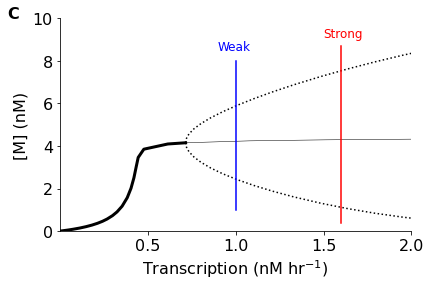

In [5]:
plot_bif_diagram("diagram_vs.dat",'forward')
plt.xlabel('Transcription (nM hr$^{-1}$)',fontsize=16)
plt.ylabel('[M] (nM)',fontsize=16)
plt.xticks((0.5,1.0,1.5,2.0),fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,10)
plt.xlim(0,2)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.tight_layout()
plt.text(0.9,8.5,'Weak',color='b',fontsize=12)
#plt.text(1.1,8.8,'Medium',color='g',fontsize=12)
plt.text(1.5,9.1,'Strong',color='r',fontsize=12)
plt.plot((1.0, 1.0), (1.0, 8.0), 'b')
#plt.plot((1.2, 1.2), (0.7, 8.3), 'g')
plt.plot((1.6, 1.6), (0.4, 8.7), 'r')

plt.text(-0.3,10,'C', fontsize=16, weight="bold")
plt.savefig('bifurc-weak-strong-C.jpeg', dpi = 300)


## Add 'A' label to model diagram in panel A

In [7]:
import sys

im1 = Image.open('diagram-model-no-light.jpeg')

draw = ImageDraw.Draw(im1)
font = ImageFont.truetype('arialbd', 72)
draw.text((37, 25),"A",fill = 'black', font = font)
im1.save('diagram-model-no-light-A.jpeg')

## Merge panels A and B and save

In [8]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import numpy as np

images1 = [Image.open(x) for x in ['diagram-model-no-light-A.jpeg','weak-strong-osc-traces-B.jpeg']]
widths1, heights1 = zip(*(i.size for i in images1))

avg_width1 = int(np.average(widths1))
avg_height1 = int(np.average(heights1))

print(avg_width1, avg_height1)

new_im = Image.new('RGB', (avg_width1*len(widths1), avg_height1))

x_offset = 0
for i in range(len(images1)):
    im2 = images1[i].resize((avg_width1,avg_height1))
    new_im.paste(im2, (x_offset,0))
    x_offset += avg_width1

new_im.save('Figure3-top.jpeg')

1708 1350


## Merge panels C and D and save

In [9]:
images1 = [Image.open(x) for x in ['bifurc-weak-strong-C.jpeg','FRP-vs-ks-weak-strong-D.jpeg']]
widths1, heights1 = zip(*(i.size for i in images1))

avg_width1 = int(np.average(widths1))
avg_height1 = int(np.average(heights1))

print(avg_width1, avg_height1)

new_im = Image.new('RGB', (avg_width1*len(widths1), avg_height1))

x_offset = 0
for i in range(len(images1)):
    im2 = images1[i].resize((avg_width1,avg_height1))
    new_im.paste(im2, (x_offset,0))
    x_offset += avg_width1

new_im.save('Figure3-bottom.jpeg')

1707 1350


## Merge A/B top panel with C/D bottom panel and save full Figure 3

In [10]:
images = [Image.open(x) for x in ['Figure3-top.jpeg',  'Figure3-bottom.jpeg']]
widths, heights = zip(*(i.size for i in images))

avg_width = int(np.average(widths))
avg_height = int(np.average(heights))

print(avg_width, avg_height)

new_im = Image.new('RGB', (avg_width, avg_height*len(heights)))

y_offset = 0
for i in range(len(images)):
    im2 = images[i].resize((avg_width,avg_height))
    new_im.paste(im2, (0,y_offset))
    y_offset += avg_height

new_im.save('Figure3.jpeg')


3415 1350
